In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import KFold
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Creating Data

In [2]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 3, cluster_std = 3.5, random_state = 42)

In [3]:
X.shape

(1000, 2)

In [4]:
np.unique(y)

array([0, 1, 2])

# Visualizing the data

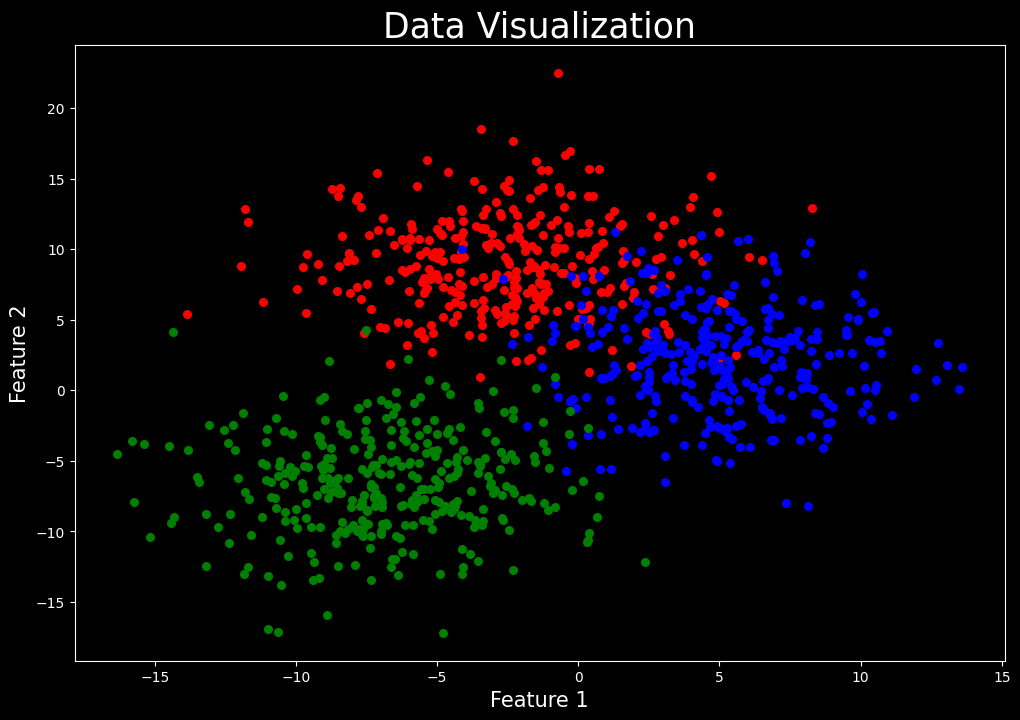

In [5]:
plt.figure(figsize = (12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 30, c = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 30, c = 'blue')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 30, c = 'green')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization', fontsize = 25)
plt.show()

# Splitting the data into test and train

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardizing the data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Visualizing the test data

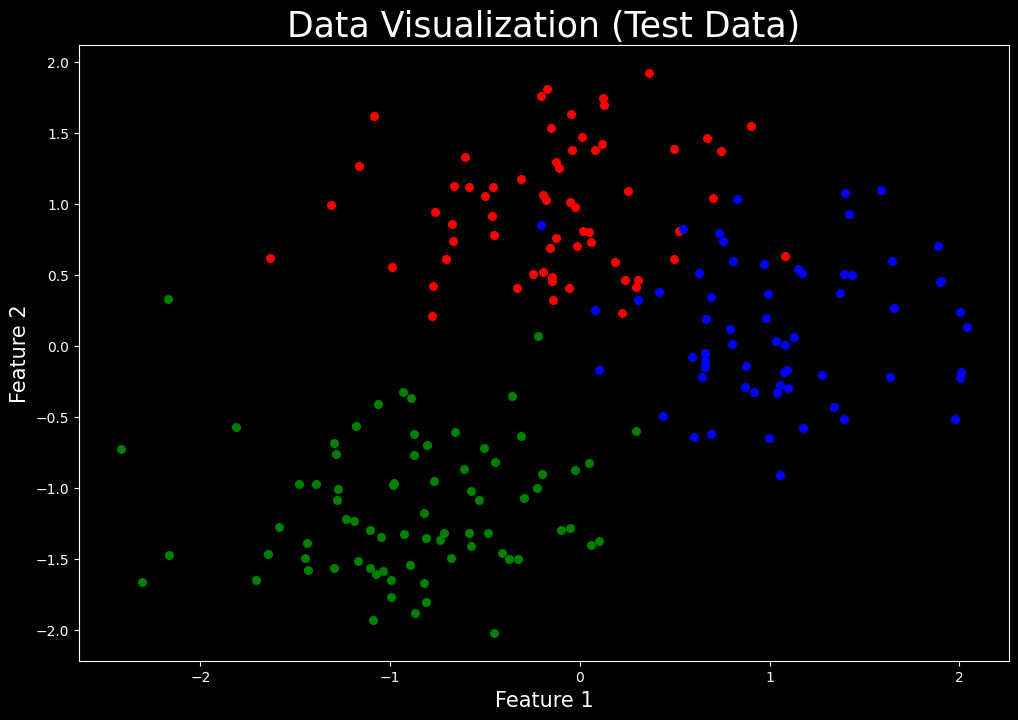

In [8]:
plt.figure(figsize = (12,8))
plt.scatter(X_test_scaled[y_test == 0, 0], X_test_scaled[y_test == 0, 1], s = 30, c = 'red')
plt.scatter(X_test_scaled[y_test == 1, 0], X_test_scaled[y_test == 1, 1], s = 30, c = 'blue')
plt.scatter(X_test_scaled[y_test == 2, 0], X_test_scaled[y_test == 2, 1], s = 30, c = 'green')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization (Test Data)', fontsize = 25)
plt.show()

# Applying KNN Classifier

In [9]:
knn = KNeighborsClassifier()

In [11]:
#help(KNeighborsClassifier)

# Training the model and Predicting the test data

In [12]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [13]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 92.50


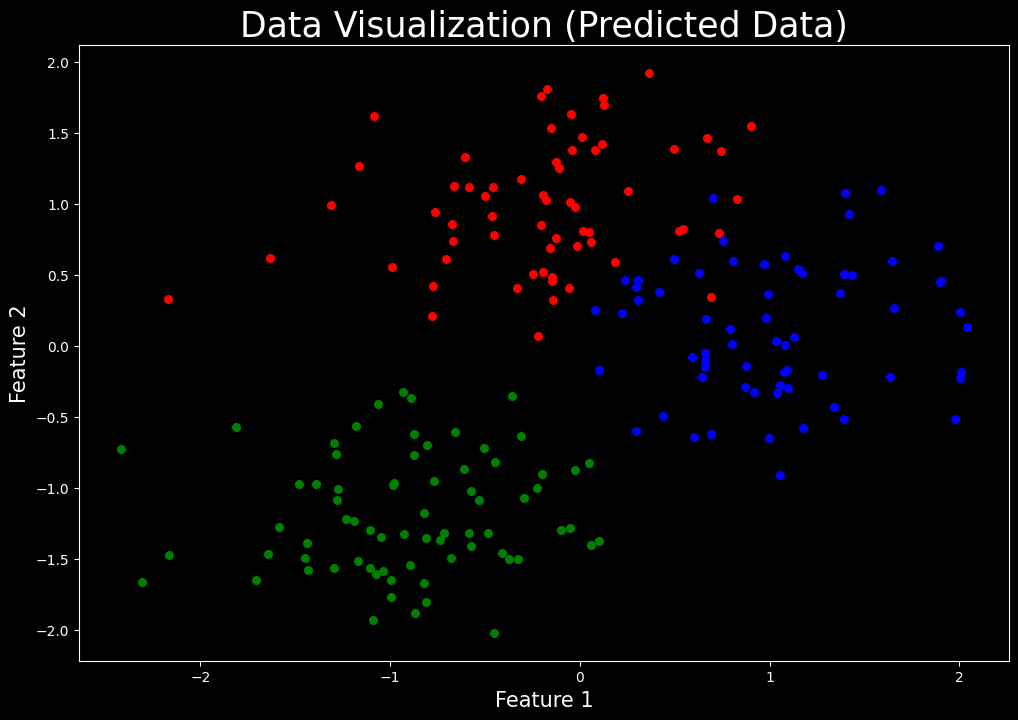

In [14]:
plt.figure(figsize = (12,8))
plt.scatter(X_test_scaled[y_pred == 0, 0], X_test_scaled[y_pred == 0, 1], s = 30, c = 'red')
plt.scatter(X_test_scaled[y_pred == 1, 0], X_test_scaled[y_pred == 1, 1], s = 30, c = 'blue')
plt.scatter(X_test_scaled[y_pred == 2, 0], X_test_scaled[y_pred == 2, 1], s = 30, c = 'green')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization (Predicted Data)', fontsize = 25)
plt.show()

# Finding Optimal Value of k Using Error Rate plot

In [15]:
Error_Rate = []

for i in range(1,30):

    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train_scaled,y_train)
    y_pred_opt = knn_opt.predict(X_test_scaled)
    Accuracy = np.mean(y_pred_opt == y_test)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)

Text(0, 0.5, 'Error Rate')

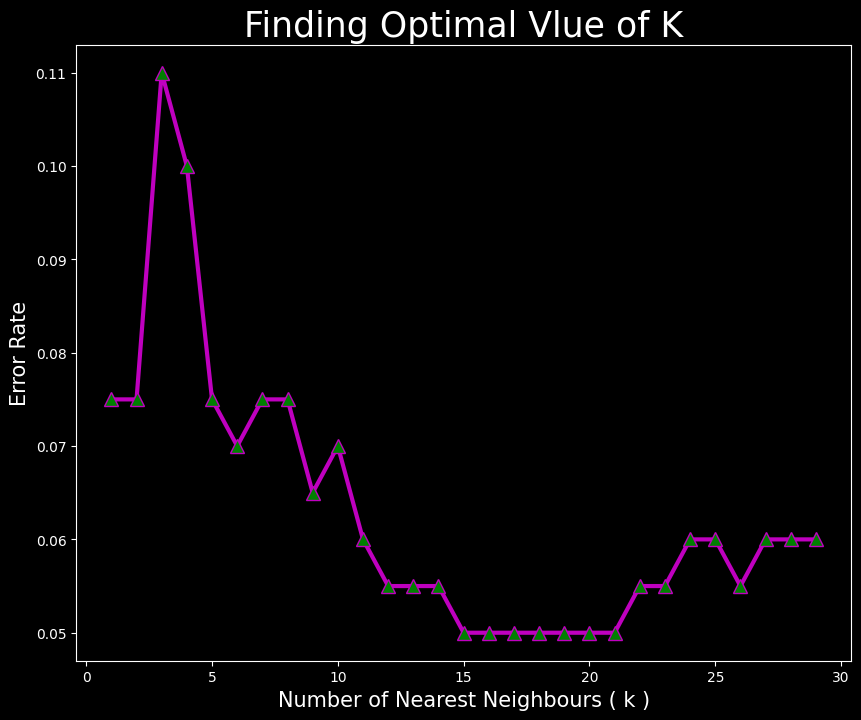

In [16]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [17]:
knn_15 = KNeighborsClassifier(n_neighbors = 15)

In [18]:
knn_15.fit(X_train_scaled, y_train)
y_pred_15 = knn_15.predict(X_test_scaled)

In [19]:
Accuracy = np.mean(y_pred_15 == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 95.00


# Find the Value of k Using GridsearchCV Method

In [20]:
k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle=True)

In [21]:
model = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(np.arange(1,30))}
KNN_GS = GridSearchCV(model, param_grid = params_KNN, cv = cv)
KNN_GSCV = KNN_GS.fit(X_train_scaled, y_train)
KNN_GSCV.best_params_

{'n_neighbors': 25}

In [22]:
y_pred_cv = KNN_GSCV.predict(X_test_scaled)

In [23]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 94.00


# Creating Confusion Matrix ( Accuracy = 95%)

In [24]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

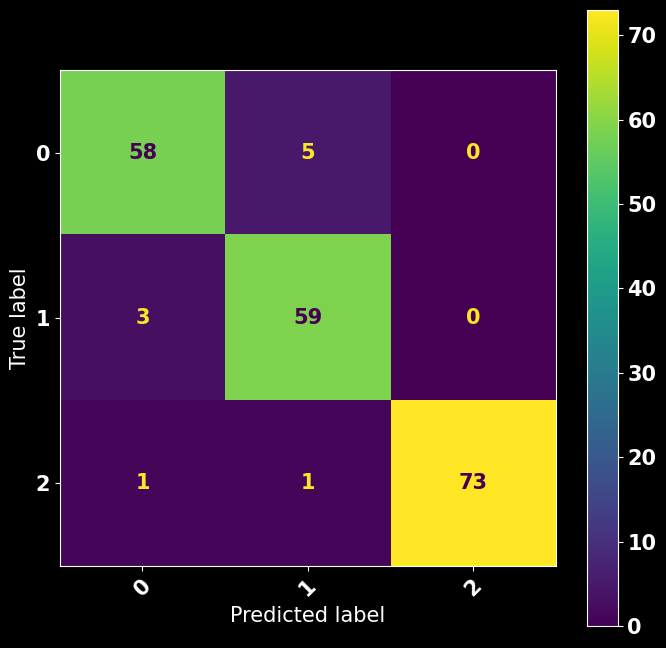

In [25]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_15)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1, 2])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

# Calculating Accuracy, Precision, Recall and F1-Score

In [26]:
Accuracy = accuracy_score(y_test, y_pred_15, normalize=True).round(3)
Precision = precision_score(y_test, y_pred_15, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(y_test, y_pred_15, average = 'macro').round(3)
F1_Score = f1_score(y_test, y_pred_15, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")


Accuracy :  0.95
 
Precision :  0.948
 
Recall :  0.949
 
F1_Score :  0.948
 
